In [1]:
import pandas as pd
import sys
from openpyxl import load_workbook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Matplotlib settings all LATEX
import matplotlib
from matplotlib import rc
rc("font", **{"family": "serif", "serif": ["Computer Modern"], "size":18})
rc("text", usetex=True)

In [2]:
# from nuclearpy_models.models.rc import sr_rc, mnp_rc
import sys
sys.path.append('../../nuclearpy_models')
from models.rc import sr_rc, mnp_rc

In [3]:
# from nuclearpy_models.models.rc import sr_rc, mnp_rc

In [4]:
exp_df = pd.read_csv('../../Data/Experimental/rc.csv', delimiter=',').query("Z>12").drop_duplicates(subset=['Z', 'N']).query("Z<=50")
exp_df["A"] = exp_df["Z"] + exp_df["N"]

In [5]:
PATH_THEORY = "../../Data/Theory/MasterNuclei.xlsx"
def get_sheets_name(filename):
    workbook = load_workbook(filename)
    return workbook.sheetnames

used_dfs = [
    "DD-ME2",
    "SKMS",
    "NL3S",
    "UNEDF1",
]

th_datastes = get_sheets_name(PATH_THEORY)
th_datastes = [th_dataste for th_dataste in th_datastes if th_dataste in used_dfs]
# th_datastes = [th_dataste for th_dataste in used_dfs if th_dataste != "AME2020"]
thdfs = {th_dataste: pd.read_excel(PATH_THEORY, sheet_name=th_dataste).query("Z >= 12 and N>=12").query("(N+Z)<250") for th_dataste in th_datastes}
th_w_target_df = {th_dataste: thdfs[th_dataste].rename(columns={"ChRad": "Rav"} ) for th_dataste in th_datastes if "ChRad" in thdfs[th_dataste].columns and "AME2020" not in th_dataste}

In [6]:
th_w_target_df = {th_dataste: thdfs[th_dataste].rename(columns={"ChRad": "Rav"} ) for th_dataste in th_datastes}

In [7]:
train_df = pd.read_csv('../../Data/Experimental/rc_train.csv', delimiter=',').query("Z>=12").drop_duplicates(subset=['Z', 'N'])
test_df = pd.read_csv('../../Data/Experimental/rc_test.csv', delimiter=',').query("Z>=12").drop_duplicates(subset=['Z', 'N'])
exp_df["is_train"] = [np.nan]*len(exp_df)
for Z, N in zip(test_df["Z"], test_df["N"]):
    try:
        exp_df["is_train"][(exp_df["Z"]==Z) & (exp_df["N"]==N)] = False
    except:
        print(Z, N)
for Z, N in zip(train_df["Z"], train_df["N"]):
    try:
        exp_df["is_train"][(exp_df["Z"]==Z) & (exp_df["N"]==N)] = True
    except:
        print(Z, N)

/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/373354907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df["is_train"][(exp_df["Z"]==Z) & (exp_df["N"]==N)] = False


In [8]:
for key, th_dset in th_w_target_df.items():
    exp_df[key] = [np.nan] * len(exp_df)


In [9]:
for key, th_dset in th_w_target_df.items():
    missing = 0
    for Z, N in zip(th_dset["Z"], th_dset["N"]):
        try:
            exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
        except:
            missing+=1
    print(f"{key} missing {missing} values")

/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying

DD-ME2 missing 0 values
NL3S missing 0 values


/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying

SKMS missing 0 values


/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying

UNEDF1 missing 0 values


/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df[key].loc[(exp_df["Z"]==Z) & (exp_df["N"]==N)] = th_dset["Rav"].loc[(th_dset["Z"]==Z) & (th_dset["N"]==N)].values[0]
/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2945352422.py:5: SettingWithCopyWarning: 
A value is trying

### Predict with saved models

In [10]:
exp_df["sr_rc"] = exp_df.apply(lambda row: sr_rc(row["Z"], row["N"], 3), axis=1)

# Remarkable plots

In [11]:
def plot_range_no_ref(Z, n_min, n_max, sq = True, index=-1,
                      save_path=None, add_label="",
                      avoid_th=False,
                      ):
    fig, ax = plt.subplots(figsize=(8, 6))
    n = np.arange(n_min, n_max+1)
    if not sq:
        plt.errorbar(exp_df.query(f"Z=={Z}")["N"], exp_df.query(f"Z=={Z}")["Rav"], yerr=exp_df.query(f"Z=={Z}")["delta_Rav"], fmt='o', label="exp", color="black")
        sns.lineplot(x=exp_df.query(f"Z=={Z}")["N"], y=exp_df.query(f"Z=={Z}")["Rav"], color="black")
        if not avoid_th:
            for key, th_dset in th_w_target_df.items():
                foo_df = exp_df.query(f"Z=={Z}").query(f"N>={n_min} and N<={n_max}")[["Z",
                    "N", key]].dropna()
                plt.scatter(foo_df["N"], foo_df[key], label=key, s=10)
                plt.plot(foo_df["N"], foo_df[key], ls="--", alpha=0.5)

        preds_sr = [sr_rc(Z, n, index=index) for n in n]
        preds_mnp = [mnp_rc(Z, n) for n in n]
        plt.plot(n, preds_mnp, color="grey", alpha=0.5)
        plt.scatter(n, preds_mnp,  label="Nerlo-Pomorska",color="grey", s=10)
        plt.plot(n, preds_sr, color="blue")
        plt.scatter(n, preds_sr, color="blue", label="MISR$^{(1)}$")
        # ax.set(xlim=(n_min, n_max), ylim=(3.41, 3.55) )
        plt.xlabel("N")
        plt.ylabel(r"$\langle r_{\rm av}\rangle$ [fm]")
        plt.legend(loc="lower right")
    else:
        n = np.arange(n_min, n_max+1)
        sns.lineplot(x=exp_df.query(f"Z=={Z}")["N"], y=exp_df.query(f"Z=={Z}")["Rav"]**2, color="black")
        delta_r_unc = exp_df.query(f"Z=={Z}")["delta_Rav"]**2 + 2*exp_df.query(f"Z=={Z}")["Rav"]*exp_df.query(f"Z=={Z}")["delta_Rav"]
        plt.errorbar(exp_df.query(f"Z=={Z}")["N"], exp_df.query(f"Z=={Z}")["Rav"]**2, yerr=delta_r_unc, fmt='o', label="exp", color="black")
        if not avoid_th:
            for key, th_dset in th_w_target_df.items():
                foo_df = exp_df.query(f"Z=={Z}").query(f"N>={n_min} and N<={n_max}")[["Z",
                    "N", key]].dropna()
                deltas = (foo_df[key]**2)
                plt.scatter(foo_df["N"], deltas, label=key, s=10)
                plt.plot(foo_df["N"],deltas, ls="--", alpha=0.5)
        preds_mnp = [mnp_rc(Z, n) for n in n]
        deltas_mnp = (np.array(preds_mnp)**2)
        plt.plot(n, deltas_mnp, color="grey", alpha=0.5, ls="--")
        plt.scatter(n, deltas_mnp,  label="NP",color="grey", s=10)
        preds_sr = [sr_rc(Z, n, index) for n in n]
        deltas_sr = (np.array(preds_sr)**2 )
        plt.plot(n, deltas_sr, color="blue")
        plt.scatter(n, deltas_sr, color="blue", label="MISR$^{(1)}$")
        # ax.set(xlim=(n_min, n_max), ylim=(3.41, 3.55) )
        plt.xlabel("N")
        plt.ylabel(r"$\langle r_{\rm av}^2\rangle$ [fm$^2$]")
        plt.legend(loc="lower right")
    if add_label:
        fig.add_artist(plt.Text(0.3, 0.7, add_label, fontsize=25))
    if save_path is not None:
        fig.savefig(save_path, bbox_inches='tight')


In [30]:
plot_range_no_ref(Z=38, n_min=38, n_max=70, sq=True, index=4, save_path="range_z_38.png", add_label="Z=$38$")

In [13]:
sr_rc.max_index

8

In [14]:
sr_rc.max_index

8

/var/folders/zg/s97g7gnj27z83xl9nrhntgxm0000gn/T/ipykernel_34938/2926457605.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(n, preds_sr, label=f"MISR$^{({idx-1})}$", c=plt.cm.viridis(idx/sr_rc.max_index), s=10)


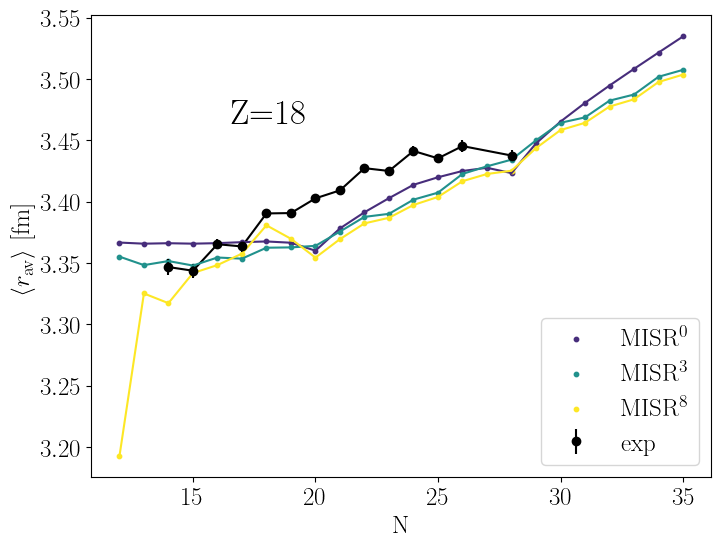

In [24]:
n_min = 12; n_max = 35
Z=18
fig, ax = plt.subplots(figsize=(8, 6))
n = np.arange(n_min, n_max+1)
plt.errorbar(exp_df.query(f"Z=={Z}")["N"], exp_df.query(f"Z=={Z}")["Rav"], yerr=exp_df.query(f"Z=={Z}")["delta_Rav"], fmt='o', label="exp", color="black")
sns.lineplot(x=exp_df.query(f"Z=={Z}")["N"], y=exp_df.query(f"Z=={Z}")["Rav"], color="black")

for idx in [1,4,9]:
    preds_sr = [sr_rc(Z, n, index=idx) for n in n]
    plt.plot(n, preds_sr, c=plt.cm.viridis(idx/sr_rc.max_index))
    plt.scatter(n, preds_sr, label=f"MISR$^{({idx-1})}$", c=plt.cm.viridis(idx/sr_rc.max_index), s=10)
# ax.set(xlim=(n_min, n_max), ylim=(3.4, 3.55) )
# add the text for Z
fig.add_artist(plt.Text(0.3, 0.7, "Z=$18$", fontsize=25))
plt.xlabel("N")
plt.ylabel(r"$\langle r_{\rm av}\rangle$ [fm]")
plt.legend(loc="lower right")
plt.savefig("range_z_19.png", bbox_inches='tight')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation

# Assuming exp_df and sr_rc function are defined
if True:
    n_min = 12
    n_max = 32
    Z = 18
    n = np.arange(n_min, n_max+1)

    # Initialize the figure
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.xlabel("N")
    plt.ylabel(r"$\langle r_{\rm av}\rangle$ [fm]")

    # Plot experimental data
    exp_data = exp_df.query(f"Z=={Z}")
    experimental_data = exp_df.query(f"Z=={Z}")["Rav"]**2
    uncertainty = exp_df.query(f"Z=={Z}")["delta_Rav"]**2 + 2*exp_df.query(f"Z=={Z}")["Rav"]*exp_df.query(f"Z=={Z}")["delta_Rav"]
    plt.errorbar(exp_df.query(f"Z=={Z}")["N"], exp_df.query(f"Z=={Z}")["Rav"]**2, yerr=uncertainty, fmt='o', label="exp", color="black")
    sns.lineplot(x=exp_data["N"], y=exp_data["Rav"]**2, color="black")

    # Add text for Z
    plt.text(0.3, 0.7, f"Z=$19$", fontsize=25, transform=ax.transAxes)

    # Function to update the plot for each frame
    def update(idx):
        ax.clear()
        plt.xlabel("N")
        plt.ylabel(r"$\langle r_{\rm av}\rangle$ [fm]")
        exp_data = exp_df.query(f"Z=={Z}")
        experimental_data = exp_df.query(f"Z=={Z}")["Rav"]**2
        uncertainty = exp_df.query(f"Z=={Z}")["delta_Rav"]**2 + 2*exp_df.query(f"Z=={Z}")["Rav"]*exp_df.query(f"Z=={Z}")["delta_Rav"]
        plt.errorbar(exp_df.query(f"Z=={Z}")["N"], exp_df.query(f"Z=={Z}")["Rav"]**2, yerr=uncertainty, fmt='o', label="exp", color="black")
        sns.lineplot(x=exp_data["N"], y=exp_data["Rav"]**2, color="black")
        preds_sr = [sr_rc(Z, n_val, index=idx)**2 for n_val in n]
        ax.plot(n, preds_sr, c=plt.cm.viridis(idx / sr_rc.max_index))
        ax.scatter(n, preds_sr, label=f"MISR$^{{({idx})}}$",
                c=[plt.cm.viridis(idx / sr_rc.max_index)] * len(n), s=10)
        plt.legend(loc="lower right")
        plt.title(f"Predictions for Z=19, Index={idx}")

    # Create the animation
    anim = FuncAnimation(fig, update, frames=range(0, sr_rc.max_index+1), repeat=False)

    # Save the animation
    anim.save('range_z_19.gif', dpi=80, writer='Pillow', fps=2)

    # Close the figure
    plt.close(fig)


MovieWriter Pillow unavailable; using Pillow instead.


In [17]:
# import os
# import imageio

# n_min = 16; n_max = 35
# Z=19
# n = np.arange(n_min, n_max+1)
# images = []
# fig, ax = plt.subplots(figsize=(8, 6))

# for idx in range(1, sr_rc.max_index+1):
#     experimental_data = exp_df.query(f"Z=={Z}")["Rav"]**2
#     uncertainty = exp_df.query(f"Z=={Z}")["delta_Rav"]**2 + 2*exp_df.query(f"Z=={Z}")["Rav"]*exp_df.query(f"Z=={Z}")["delta_Rav"]
#     plt.errorbar(exp_df.query(f"Z=={Z}")["N"], exp_df.query(f"Z=={Z}")["Rav"]**2, yerr=uncertainty, fmt='o', label="exp", color="black")
#     preds_sr = [sr_rc(Z, n, index=idx)**2 for n in n]
#     plt.plot(n, preds_sr, c=plt.cm.viridis(idx/sr_rc.max_index))
#     plt.scatter(n, preds_sr, label=f"MISR$^{({idx})}$", c=plt.cm.viridis(idx/sr_rc.max_index), s=10)
#     fig.add_artist(plt.Text(0.3, 0.7, "Z=$19$", fontsize=25))
#     plt.xlabel("N")
#     plt.ylabel(r"$\langle r_{\rm av}^2\rangle$ [fm]")
#     plt.legend(loc="lower right")
# plt.show()
# Ensure all arrays used in the operation have the same shape
# This is a placeholder for your code fix, as the actual fix would depend on the specific arrays and operation in your code


In [18]:
# compute all the errors
for key, th_dset in th_w_target_df.items():
    exp_df[f"delta_{key}"] = exp_df.apply(lambda row: np.nan if np.isnan(row[key]) else np.abs(row[key] - row["Rav"]), axis=1)

In [19]:
exp_df["delta_mnp"] = exp_df.apply(lambda row: mnp_rc(row["Z"], row["N"]) - row["Rav"], axis=1)

In [20]:
# Training and test errors
train_errors_df = {key: exp_df.query("is_train==True")[f"delta_{key}"].mean() for key, th_dset in th_w_target_df.items()}
exp_df["error_sr"] = exp_df.apply(lambda row: np.abs(row["sr_rc"] - row["Rav"]), axis=1)
train_errors_df["sr_rc"] = np.abs(exp_df[["error_sr", "is_train"]].query("is_train==True")).error_sr.mean()
train_errors_df["mnp_rc"] = np.abs(exp_df[["delta_mnp", "is_train"]].query("is_train==True")).delta_mnp.mean()

# Training and test errors
test_errors_df = {key: exp_df.query("is_train==False")[f"delta_{key}"].mean() for key, th_dset in th_w_target_df.items()}
exp_df["error_sr"] = exp_df.apply(lambda row: np.abs(row["sr_rc"] - row["Rav"]), axis=1)
test_errors_df["sr_rc"] = np.abs(exp_df[["error_sr", "is_train"]].query("is_train==False")).error_sr.mean()
test_errors_df["mnp_rc"] = np.abs(exp_df[["delta_mnp", "is_train"]].query("is_train==False")).delta_mnp.mean()

# Merge both as a single dataframe with two columns
train_errors_df = pd.DataFrame(train_errors_df, index=["train"]).T
test_errors_df = pd.DataFrame(test_errors_df, index=["test"]).T
errors_df = train_errors_df
errors_df["test"] = test_errors_df["test"]
errors_df

train      test
DD-ME2  0.018918  0.016045
NL3S    0.027756  0.025507
SKMS    0.018543  0.015610
UNEDF1  0.025896  0.019544
sr_rc   0.019002  0.015832
mnp_rc  0.023393  0.017872

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


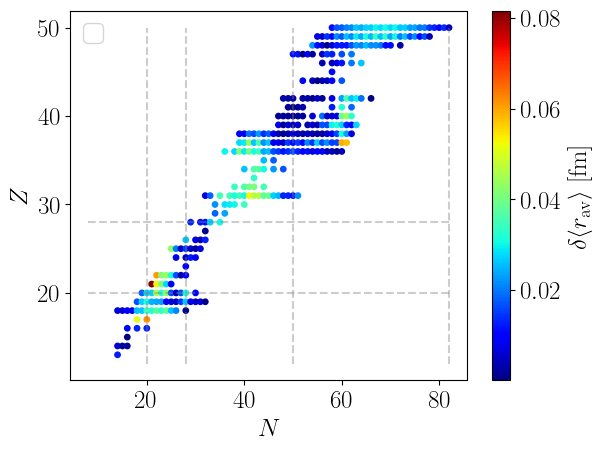

In [21]:
fig, ax = plt.subplots()
g = ax.scatter(exp_df["N"], exp_df["Z"], c=exp_df["error_sr"], cmap="jet", s=15)
plt.colorbar(g, label = r"$\delta\langle r_{\mathrm{av}}\rangle$ [fm]")
n_protons = [20, 28]#, 82, 114]
n_neutrons = [ 20, 28, 50, 82]#, 126, 184]
# Put lines at the edges of the nuclei
ax.hlines(n_protons, 8, exp_df["N"].max(), color="grey", linestyle="--", alpha=0.4)
ax.vlines(n_neutrons, 12, exp_df["Z"].max(), color="grey", linestyle="--", alpha=0.4,)
# plot a black line at Z=N
# ax.plot([12, exp_df["Z"].max()], [12 ,exp_df["Z"].max()], c="black", label="Z:N", ls="--")
# ax.plot([0, exp_df["N"].max()], [0,exp_df["N"].max()], c="black", label="Z:N", ls="--")
ax.set_xlabel("$N$")
ax.set_ylabel("$Z$", rotation=90)
ax.legend()
plt.savefig("./plots/sr_error_map.pdf", bbox_inches="tight")

In [22]:
sr_rc.max_index

8